# Algoritmo Exploracion Datos

De los datos proporcionados por SCHP, se eligen algunas columnas para trabajar la información 
y se exploran las relaciones entre los montos registrados por mes, año, mes-año y año-sector. 
La intención es responder las siguientes preguntas sencillas:

* ¿En que anio se registro un mayor monto?
* ¿En que mes se tienen la media mas alta de monto?
* ¿En que anio y mes se registran los mayores montos?
* ¿En que anio y sector se registran los mayores montos?

Fuente: [SHCP](http://catalogo.datos.gob.mx/dataset/estadisticas-oportunas-de-finanzas-publicas)

In [2]:
#%%librerias
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
#%% tipo de grafico
plt.rcParams['figure.figsize']=(20,7)

In [6]:
#%% cargar datos
data = pd.read_csv('../../data/ingresos.csv')

In [7]:
#%% checar la informacion
data.head()

,CICLO,MES,CLAVE_DE_CONCEPTO,NOMBRE,TEMA,SUBTEMA,SECTOR,AMBITO,TIPO_DE_INFORMACION,BASE_DE_REGISTRO,UNIDAD_DE_MEDIDA,PERIODO_INICIO,PERIODO_FINAL,FRECUENCIA,DIFUSION,MONTO
0,2011,Enero,XAB2120,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Ingreso,Sector P�blico Federal Presupuestario,Federal,Flujo,Pagado,Miles de Pesos,1990-01,2014-12,Mensual,30 d�as despu�s del cierre del mes de referencia,71395961.50
1,2011,Febrero,XAB2120,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Ingreso,Sector P�blico Federal Presupuestario,Federal,Flujo,Pagado,Miles de Pesos,1990-01,2014-12,Mensual,30 d�as despu�s del cierre del mes de referencia,54388828.94
2,2011,Marzo,XAB2120,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Ingreso,Sector P�blico Federal Presupuestario,Federal,Flujo,Pagado,Miles de Pesos,1990-01,2014-12,Mensual,30 d�as despu�s del cierre del mes de referencia,57029276.54
3,2011,Abril,XAB2120,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Ingreso,Sector P�blico Federal Presupuestario,Federal,Flujo,Pagado,Miles de Pesos,1990-01,2014-12,Mensual,30 d�as despu�s del cierre del mes de referencia,78204809.99
4,2011,Mayo,XAB2120,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Ingreso,Sector P�blico Federal Presupuestario,Federal,Flujo,Pagado,Miles de Pesos,1990-01,2014-12,Mensual,30 d�as despu�s del cierre del mes de referencia,76701991.05


In [8]:
#%% numero de filas y columnas
data.shape

(204246, 16)

In [9]:
#%% descripcion general de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204246 entries, 0 to 204245
Data columns (total 16 columns):
CICLO                  204246 non-null int64
MES                    204246 non-null object
CLAVE_DE_CONCEPTO      204246 non-null object
NOMBRE                 204153 non-null object
TEMA                   204246 non-null object
SUBTEMA                204246 non-null object
SECTOR                 204246 non-null object
AMBITO                 204246 non-null object
TIPO_DE_INFORMACION    204246 non-null object
BASE_DE_REGISTRO       204246 non-null object
UNIDAD_DE_MEDIDA       204246 non-null object
PERIODO_INICIO         204246 non-null object
PERIODO_FINAL          204246 non-null object
FRECUENCIA             204246 non-null object
DIFUSION               204246 non-null object
MONTO                  204246 non-null float64
dtypes: float64(1), int64(1), object(14)
memory usage: 24.9+ MB


In [10]:
#%% tipo de dato
data.dtypes

CICLO                    int64
MES                     object
CLAVE_DE_CONCEPTO       object
NOMBRE                  object
TEMA                    object
SUBTEMA                 object
SECTOR                  object
AMBITO                  object
TIPO_DE_INFORMACION     object
BASE_DE_REGISTRO        object
UNIDAD_DE_MEDIDA        object
PERIODO_INICIO          object
PERIODO_FINAL           object
FRECUENCIA              object
DIFUSION                object
MONTO                  float64
dtype: object

In [11]:
#%% nombre de las columnas
data.columns

Index(['CICLO', 'MES', 'CLAVE_DE_CONCEPTO', 'NOMBRE', 'TEMA', 'SUBTEMA',
       'SECTOR', 'AMBITO', 'TIPO_DE_INFORMACION', 'BASE_DE_REGISTRO',
       'UNIDAD_DE_MEDIDA', 'PERIODO_INICIO', 'PERIODO_FINAL', 'FRECUENCIA',
       'DIFUSION', 'MONTO'],
      dtype='object')

In [12]:
#%% seleccionamos las columnas mas importantes
dataP = data[['CICLO','MES','NOMBRE','TEMA','SECTOR','MONTO']]

In [13]:
#%% desplegar dataP
dataP.head()

,CICLO,MES,NOMBRE,TEMA,SECTOR,MONTO
0,2011,Enero,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Sector P�blico Federal Presupuestario,71395961.50
1,2011,Febrero,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Sector P�blico Federal Presupuestario,54388828.94
2,2011,Marzo,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Sector P�blico Federal Presupuestario,57029276.54
3,2011,Abril,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Sector P�blico Federal Presupuestario,78204809.99
4,2011,Mayo,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Sector P�blico Federal Presupuestario,76701991.05


In [14]:
#%% cual es el anio con mayor monto registrado
group1 = dataP.groupby('CICLO')

In [15]:
#%% cantidad de registros para cada anio
group1.size()

CICLO
2011    32424
2012    32964
2013    32766
2014    32616
2015    32928
2016    32940
2017     7608
dtype: int64

In [16]:
#%% sumatoria de registros para cada anio
group1.sum()

,MONTO
CICLO,
2011,2.379621e+11
2012,2.738600e+11
2013,2.843412e+11
2014,2.983151e+11
2015,3.189862e+11
2016,3.541459e+11
2017,8.905116e+10


In [17]:
#%% cantidad de registros en cada mes
group2 = dataP.groupby('MES')

In [18]:
#%% cantidad de registros para cada mes
group2.size()

MES
Abril         16408
Agosto        16365
Diciembre     16365
Enero         18944
Febrero       18944
Julio         16365
Junio         16408
Marzo         18944
Mayo          16408
Noviembre     16365
Octubre       16365
Septiembre    16365
dtype: int64

In [19]:
#%% media
group2.mean()

,CICLO,MONTO
MES,,
Abril,2013.505241,8.521493e+06
Agosto,2013.506569,8.400153e+06
Diciembre,2013.506569,1.309630e+07
Enero,2013.973079,9.778168e+06
Febrero,2013.973079,7.657616e+06
Julio,2013.506569,8.865271e+06
Junio,2013.505241,9.431059e+06
Marzo,2013.973079,9.054946e+06
Mayo,2013.505241,8.163491e+06


La variable ciclo se despliega como una variable númerica para desplegar la media solo del monto

In [20]:
group2.mean()['MONTO']

MES
Abril         8.521493e+06
Agosto        8.400153e+06
Diciembre     1.309630e+07
Enero         9.778168e+06
Febrero       7.657616e+06
Julio         8.865271e+06
Junio         9.431059e+06
Marzo         9.054946e+06
Mayo          8.163491e+06
Noviembre     9.334717e+06
Octubre       8.402475e+06
Septiembre    8.504152e+06
Name: MONTO, dtype: float64

Si se desea saber cual es el mes con la media de montos mayor, basta elegi
el máximo de los valores de las medias al ordenarlas. En este caso corresponde al mes de Diciembre

In [21]:
group2['MONTO'].mean().sort_values()[-1:]

MES
Diciembre    1.309630e+07
Name: MONTO, dtype: float64

In [22]:
#%% agrupamos la informacion por anio y mes para conocer como se comportan los montos
group3 = dataP.groupby(['CICLO', 'MES'])

In [23]:
#%% vemos el valor de la suma de los montos
group3.sum()

MONTO
CICLO MES                     
2011  Abril       1.713068e+10
      Agosto      1.829602e+10
      Diciembre   3.108470e+10
      Enero       1.994771e+10
      Febrero     1.592494e+10
      Julio       1.925813e+10
      Junio       2.093639e+10
      Marzo       1.797207e+10
      Mayo        1.744671e+10
      Noviembre   2.206084e+10
      Octubre     1.795775e+10
      Septiembre  1.994617e+10
2012  Abril       2.012825e+10
      Agosto      2.035841e+10
      Diciembre   2.755660e+10
      Enero       2.491415e+10
      Febrero     2.002949e+10
      Julio       2.359643e+10
      Junio       2.558007e+10
      Marzo       2.251921e+10
      Mayo        2.088089e+10
      Noviembre   2.548485e+10
      Octubre     2.184588e+10
      Septiembre  2.096575e+10
2013  Abril       2.251555e+10
      Agosto      1.971382e+10
      Diciembre   3.693796e+10
      Enero       2.361080e+10
      Febrero     2.000657e+10
      Julio       2.233091e+10
...                        ...
2014  Noviembre   2.639273e+10
      Octubre     2.529280e+10
      Septiembre  2.459482e+10
2015  Abril       2.361500e+10
      Agosto      2.296147e+10
      Diciembre   3.737937e+10
      Enero       3.099193e+10
      Febrero     2.133210e+10
      Julio       2.648610e+10
      Junio       2.788232e+10
      Marzo       2.722408e+10
      Mayo        2.406075e+10
      Noviembre   2.926969e+10
      Octubre     2.385168e+10
      Septiembre  2.393168e+10
2016  Abril       3.217435e+10
      Agosto      3.424457e+10
      Diciembre   5.061310e+10
      Enero       2.901168e+10
      Febrero     2.220717e+10
      Julio       2.693395e+10
      Junio       2.755056e+10
      Marzo       2.580273e+10
      Mayo        2.754414e+10
      Noviembre   2.671752e+10
      Octubre     2.600267e+10
      Septiembre  2.534348e+10
2017  Enero       2.992876e+10
      Febrero     2.453859e+10
      Marzo       3.458380e+10

[75 rows x 1 columns]

In [24]:
#%% para elegir los 5 registros con los montos mas altos, hacemos la siguiente seleccion al group3
group3.sum().sort_values(by='MONTO')[-5:]

,,MONTO
CICLO,MES,
2016,Agosto,3.424457e+10
2017,Marzo,3.458380e+10
2013,Diciembre,3.693796e+10
2015,Diciembre,3.737937e+10
2016,Diciembre,5.061310e+10


Se puede revisar como se comporta por CICLO y SECTOR, elegimos los 15 registros con valor mas alto en la suma de su MONTO

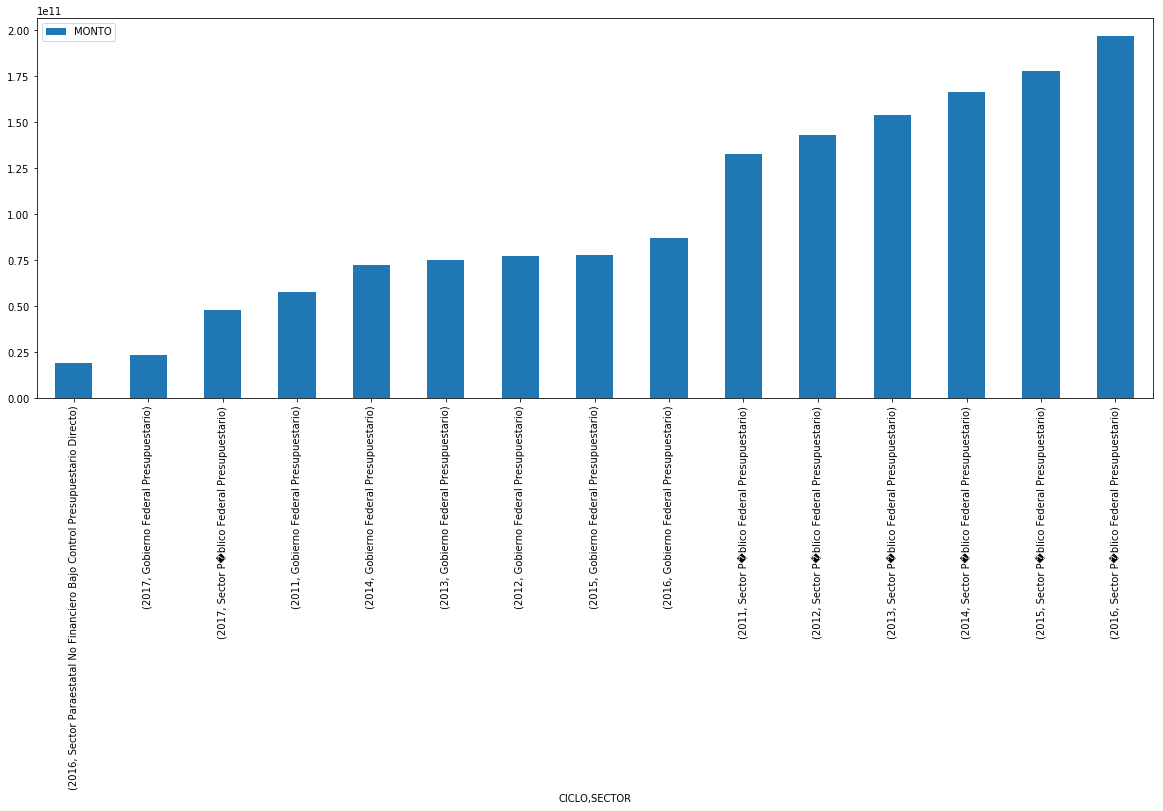

In [25]:
group4 = dataP.groupby(['CICLO', 'SECTOR']).sum().sort_values(by='MONTO')[-15:].plot(kind='bar')

In [26]:
#%% mostrar cantidad, sumatoria, max y min en valores
group1['MONTO'].agg([np.size, sum, max, min])

,size,sum,max,min
CICLO,,,,
2011,32424.0,2.379621e+11,544852555.6,-143436924.4
2012,32964.0,2.738600e+11,498997561.0,-198748691.3
2013,32766.0,2.843412e+11,607273345.4,-143636953.9
2014,32616.0,2.983151e+11,513922357.1,-223804440.5
2015,32928.0,3.189862e+11,624748976.6,-178267800.3
2016,32940.0,3.541459e+11,829740171.0,-305468720.1
2017,7608.0,8.905116e+10,729628152.5,-523277461.1


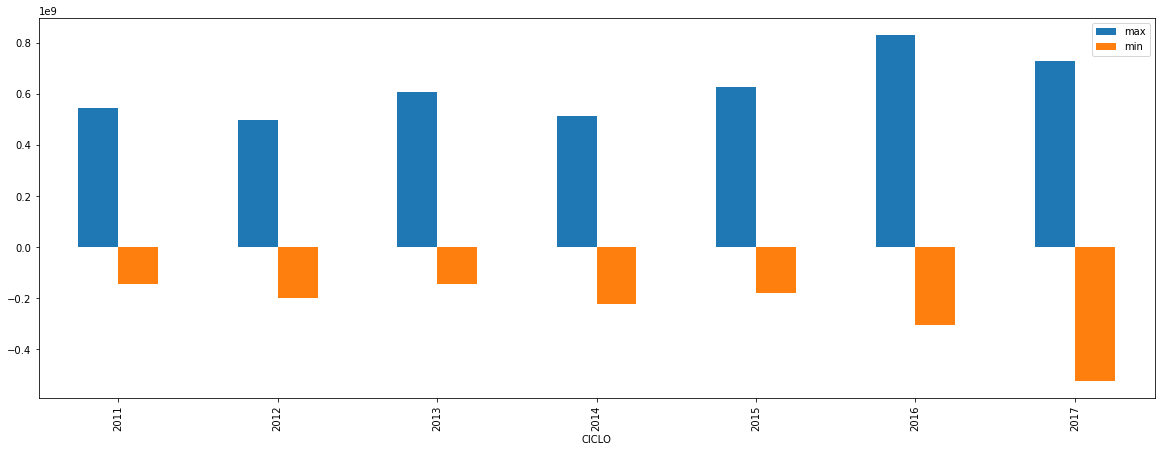

In [27]:
#%% comparativo entre maximo y minimo
group1['MONTO'].agg([max, min]).plot(kind='bar')

In [28]:
#%% se explora como se comporta la agrupacion por mes, mediante una grafica de barras
group2['MONTO'].agg([max, min, np.mean])

,max,min,mean
MES,,,
Abril,627817621.5,-275600730.7,8.521493e+06
Agosto,515823707.8,-172637591.9,8.400153e+06
Diciembre,829740171.0,-305468720.1,1.309630e+07
Enero,459975868.9,-120080152.5,9.778168e+06
Febrero,354891740.3,-130934274.6,7.657616e+06
Julio,412318159.7,-126137660.6,8.865271e+06
Junio,514365469.1,-189351217.3,9.431059e+06
Marzo,729628152.5,-523277461.1,9.054946e+06
Mayo,431353098.5,-126366330.7,8.163491e+06


Los datos originales permiten explorar graficamente como se relacionan los valores de los montos con respecto a los meses

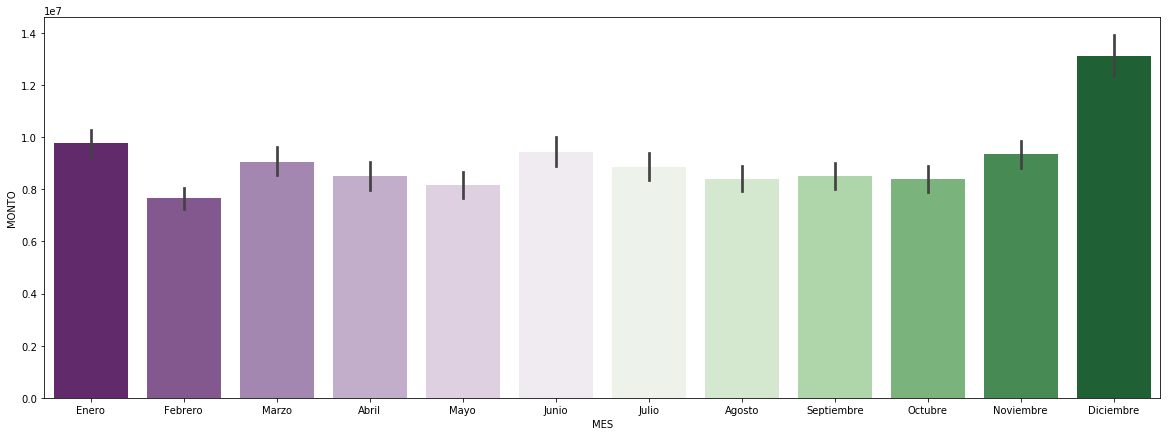

In [29]:
sns.barplot(data=dataP, x='MES', y='MONTO', palette='PRGn')

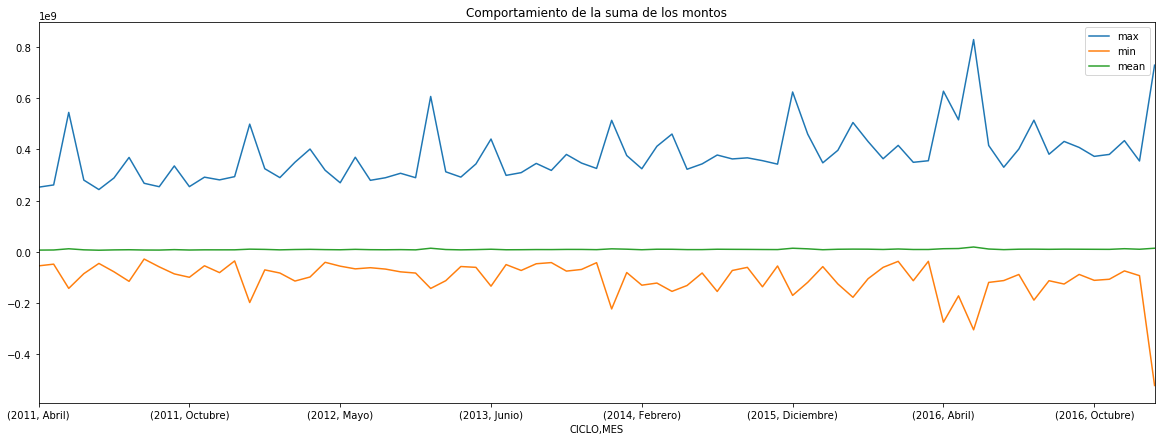

In [30]:
#%% explorar los datos agrupados por anio-mes
group3['MONTO'].agg([max, min, np.mean]).plot(title='Comportamiento de la suma de los montos')